### Check segmentation
Perform EM on fitted spots to find the final chromatin trace

In [2]:
import numpy as np
import glob,os,sys

In [3]:
fls_seg = np.sort(glob.glob(r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis\*dapi_seg*.png'))
print(fls_seg)
!"{fls_seg[1]}"

['\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_000--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_002--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_004--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_006--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_008--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_010--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_012--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\\merfish6v2\\DNA_FISH\\20230122_R120PVTS32RDNA_Analysis\\Conv_zscan_F_014--dapi_seg__segim20.png'
 '\\\\MERFISH6.ucsd.edu\

### DNA images

In [175]:
fl = r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis\Conv_zscan_F_001--H8R13_14_15_DNA_signal-col1.png'
os.path.exists(fl)
!{fl}

In [172]:
fls = np.sort(glob.glob(r'\\MERFISH6.ucsd.edu\merfish6v2\DNA_FISH\20230122_R120PVTS32RDNA_Analysis\*R13_14_15*-col1.png'))
!"{fls[1]}"

^C


### Convert .dax files to .zarr

In [49]:
def convert_dax_to_zarr(dax_fl,shape=[240,2800,2800],remove=False):
    print(dax_fl)
    im = np.fromfile(dax_fl,dtype=np.uint16).reshape(shape)
    #import napari
    #napari.view_image(im)
    filename = dax_fl.replace('.dax','.zarr')
    dirname = os.path.dirname(filename)
    group = dirname+os.sep+os.path.basename(filename).split("_")[-1].split(".")[0]

    #import shutil
    #if os.path.exists(group): shutil.rmtree(group)

    root = zarr.open(filename, mode='w')
    group = root.create_group(group)
    h,w=im.shape[-2:]
    z1 = group.empty('data', shape=(1,h,w), chunks=(1,h,w), dtype='uint16')
    for image in im:
        image = np.array(image).reshape((1,h,w))
        z1.append(image)
    if remove:
        os.remove(dax_fl)

In [41]:
#convert_dax_to_zarr(dax_fl,shape=[240,2800,2800],remove=True)

Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__53.dax


In [44]:
import glob,os,zarr,shutil,numpy as np
dax_fls = glob.glob(r'Z:\TK_FFBBL1_SampleA_1_27_2023\H*\*.dax')


In [50]:
for dax_fl in tqdm(dax_fls):
    convert_dax_to_zarr(dax_fl,shape=[240,2800,2800],remove=True)

  0%|          | 0/331 [00:00<?, ?it/s]

Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__43.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__44.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__45.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__46.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__47.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__48.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__49.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__50.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__51.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__52.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__54.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__55.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__56.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__57.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan__58.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H29R85_86_87\Conv_zscan_

Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__25.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__26.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__27.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__28.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__29.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__30.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__31.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__32.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__33.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__34.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__35.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__36.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__37.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__38.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan__39.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H31R91_92_93\Conv_zscan_

Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__06.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__07.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__08.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__09.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__10.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__11.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__12.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__13.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__14.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__15.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__16.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__17.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__18.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__19.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan__20.dax
Z:\TK_FFBBL1_SampleA_1_27_2023\H33R97_98_99\Conv_zscan_

### Move all previous analysis to a new folder

In [17]:
import shutil,glob,os
fls = [fl for fl in glob.glob(r'Z:\TK_FFBBL1_SampleA_1_27_2023_Analysis\*.*') if '--H' in fl]
fls
destination = r'Z:\TK_FFBBL1_SampleA_1_27_2023_Analysis\old_analysis'
if not os.path.exists(destination):os.makedirs(destination)
from tqdm.notebook import tqdm
for fl in tqdm(fls):
    shutil.move(fl, destination) 

  0%|          | 0/3203 [00:00<?, ?it/s]

### Trace analysis

In [1]:
import numpy as np
import glob,os,sys
import cv2
import matplotlib.pyplot as plt
import tifffile

from tqdm.notebook import tqdm
import pickle
from scipy.spatial.distance import cdist

In [3]:
!{ctpa.__file__}

In [2]:
import sys,os,glob
import ChrTracingPA as ctpa
import imp
imp.reload(ctpa)
import numpy as np
import matplotlib.pylab as plt
import pickle
from tqdm.notebook import tqdm
#chr_ = None
save_folder=r'Data_Tula'
chr_ = ctpa.chromatin_postfits(save_folder=save_folder,nHs=7)

Detected fovs: 2 [19, 27]
Detected complete fovs: 2 [19, 27]
Detected number of hybes: [59, 62]


### Load a FOV for testing and calibration

In [3]:
fov=19
chr_.load_fov(fov,volume_th=2000)
save_fl = chr_.save_folder+os.sep+"Fov"+str(fov)+"_zxys_f.pkl"

  0%|          | 0/62 [00:00<?, ?it/s]

Found cells: 14


### Load a cell from that FOV

In [16]:
Xs,Rs,hs,Xs_,Rs_,hs_ = ctpa.get_points_cell(chr_,icell_=8,bad_points=50,std_th=0.15,pix = [0.25,0.10833,0.10833])

0.13365314549429197 0.1


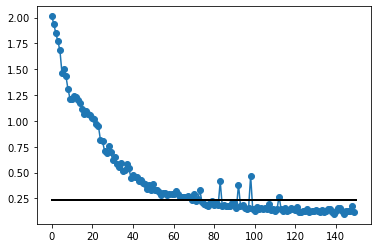

In [20]:
plt.figure()
for iR in np.unique(Rs)[[30]]:#20
    inds = np.argsort(hs[Rs==iR])[:100]
    #bks = bknorm[Rs==iR][inds]
    plt.plot(hs[Rs==iR],'o-')
    #plt.plot(bks-np.mean(bks),'o-')
    min_ = np.median(np.sort(hs[Rs==iR])[:50])
    std_ = 0.1#np.std(np.sort(hsnorm[Rs==iR])[:50])*20
    print(min_,std_)
    plt.plot([0,np.sum(Rs==iR)],[min_+std_,min_+std_],'k',lw=2)
#plt.plot(np.sort(hsnorm),'o-')

### Check dapi -  determine which cell

In [21]:

fl = chr_.fls_fov[0]
imseg = np.load(fl.split('--')[0]+'--dapi_seg.npz')['arr_0']
XsCell = Xs_[:,1:]/[0.10833,0.10833]/[6,6]
import napari
viewer  = napari.view_labels(imseg[len(imseg)//2])
viewer.add_points(XsCell)

<Points layer 'XsCell' at 0x23c13ce2730>

Cannot find steve


### Check the points in 3D

In [22]:
len(Xs_)

7094

In [23]:
#XsE = np.concatenate([Rs[:,np.newaxis],Xs],axis=-1)
import napari
from matplotlib import cm as cmap
#Xs_,Rs_,hs_
size=np.clip(hs_,0,1)*0.25+0.

viewer = napari.Viewer()
#keep = (hsnorm>0.2)#&(Rs==71)
cols = cmap.rainbow(Rs_/np.max(Rs_))
#keep = is_good#&np.in1d(Rs,[10,11,12])
txt = list((Rs_-3).astype(str))
text = {
    'string': txt,
    'size': 10,
    'color': 'white'}
viewer.add_points(Xs_*[0.5,1,1],size=size,face_color=cols,edge_color=[0,0,0,0],edge_width=0,text=text)

<Points layer 'Points' at 0x23c31094a90>

Cannot find steve


### Compile data for all cells

In [672]:
Xs_,Rs_,hs_,cells_ = [],[],[],[]
Xs_all,Rs_all,hs_all,cells_all = [],[],[],[]
for icell in np.arange(len(chr_.cells)):
    Xs,Rs,hsnorm,Xs_T,Rs_T,hs_T = ctpa.get_points_cell(chr_,
                                icell_=icell,bad_points=50,std_th=0.05)
    Xs_.extend(Xs_T)
    Rs_.extend(Rs_T)
    hs_.extend(hs_T)
    cells_.extend([icell]*len(Xs_T))
    Xs_all.extend(Xs)
    Rs_all.extend(Rs)
    hs_all.extend(hsnorm)
    cells_all.extend([icell]*len(Xs))
Xs_,Rs_,hs_,cells_ = np.array(Xs_),np.array(Rs_),np.array(hs_),np.array(cells_)
Xs_all,Rs_all,hs_all,cells_all = np.array(Xs_all),np.array(Rs_all),np.array(hs_all),np.array(cells_all)

## Correct chromatic abberation and drift

### Assume the following: 

1) There is a consistent chromatic shift between the colors for each cell

2) There is a drift across hybes that can be corrected for from the nearest neighbours

In [26]:
!{ctpa.__file__}

In [29]:
#icols_ = (Rs_-1)%3
#chr_.dic_Rcol =  {R:icol for icol,R in zip(icols_,Rs_)}

C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\Bogdan\Dropbox\ChromatinTracing2023\ChrTracingPA.py:225: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  drift_hybe = {hybe:res[iH]for iH,hybe in enumerate(Hybes)}


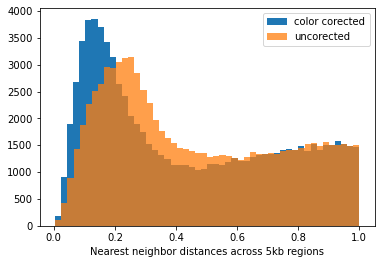

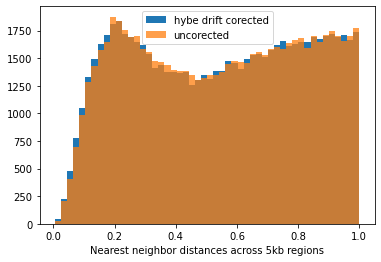

In [673]:
dic_Rcol = chr_.dic_Rcol
dic_col_drift = ctpa.compute_color_drift_per_cell(Xs_,Rs_,cells_,dic_Rcol,th_dist=0.5)
Xs_CC = Xs_.copy()
diff_ = np.array([dic_col_drift[(cell,dic_Rcol[iR])]for cell,iR in zip(cells_,Rs_)])
Xs_CC+=diff_

plt.hist(ctpa.get_NN_distances(Xs_CC,Rs_,deltaR=1,th_dist=1),bins=50,label='color corected');
plt.hist(ctpa.get_NN_distances(Xs_,Rs_,deltaR=1,th_dist=1),bins=50,alpha=0.75,label='uncorected');
plt.xlabel('Nearest neighbor distances across 5kb regions')
plt.legend()


icols_ = (Rs_-1)%3
Hybe_ = (Rs_-1)//3
drift_hybe = ctpa.compute_hybe_drift(Xs_CC,Hybe_,ncompare = 20,npoint=50)
Xs_CC = Xs_.copy()
diff_ = np.array([dic_col_drift[(cell,dic_Rcol[iR])]for cell,iR in zip(cells_,Rs_)])
Xs_CC+=diff_
Xs_D = Xs_CC.copy()
Xs_D-= np.array([drift_hybe[hybe] for hybe in Hybe_])
plt.figure()
plt.hist(ctpa.get_NN_distances(Xs_D,Rs_,deltaR=2,th_dist=1),bins=50,label='hybe drift corected');
plt.hist(ctpa.get_NN_distances(Xs_CC,Rs_,deltaR=2,th_dist=1),bins=50,alpha=0.75,label='uncorected');
plt.xlabel('Nearest neighbor distances across 5kb regions')
plt.legend()

### Calibrate the polymer model based on nearest neighbour

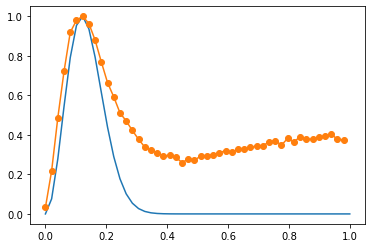

In [674]:
def w(x,s=0.085,norm=True): 
    ssq=s*s
    xsq = x*x
    w_= 4*np.pi*xsq/(2*np.pi*ssq)**(3/2)*np.exp(-xsq/2/ssq)
    if norm:
        w_ = w_/np.max(w_)
    return w_/np.max(w_)
x = np.linspace(0,1,50)
all_dists = ctpa.get_NN_distances(Xs_D,Rs_, deltaR=1)
ns,_ = np.histogram(all_dists,bins=x)

plt.plot(x,w(x))
#plt.plot(x,wR(x))
plt.plot(x[:-1],ns/np.max(ns),'o-')



In [675]:
def w(x,gd=1,s1=0.085,normed=True): 
    sigmasq = 0.025**2
    k = (s1*s1-2*sigmasq)/1
    ssq = 2*sigmasq+k*gd
    xsq = x*x
    w_= 4*np.pi*xsq/(2*np.pi*ssq)**(3/2)*np.exp(-xsq/2/ssq)
    #w_ = xsq*np.exp(-xsq/2/ssq)
    #if normed:
    #    w_ = w_/np.sum(w_)
    #w_ = np.cumsum(w_[::-1])[::-1]
    return w_

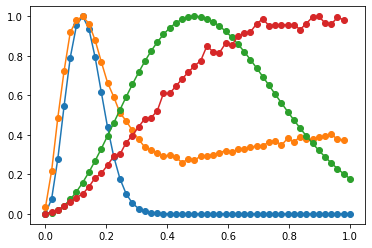

Cannot find steve


In [703]:
x = np.linspace(0,1,50)
plt.figure()
plt.plot(x,w(x,gd=1)/np.max(w(x,gd=1)),'o-')
all_dists = ctpa.get_NN_distances(Xs_D,Rs_, deltaR=1)
ns,_ = np.histogram(all_dists,bins=x)
plt.plot(x[:-1],ns/np.max(ns),'o-')


plt.plot(x,w(x,gd=20)/np.max(w(x,gd=20)),'o-')
all_dists = ctpa.get_NN_distances(Xs_D,Rs_, deltaR=20)
ns,_ = np.histogram(all_dists,bins=x)
plt.plot(x[:-1],ns/np.max(ns),'o-')
#plt.plot(x,w(x,gd=2),'-')
#plt.plot(x,w(x,gd=20),'o-')
#plt.plot(x,w(x,gd=100),'o-')

In [722]:

keep_tr[-1]

96

In [666]:
reload(ctpa)

<module 'ChrTracingPA' from 'C:\\Users\\Bogdan\\Dropbox\\ChromatinTracing2023\\ChrTracingPA.py'>

  0%|          | 0/171968 [00:00<?, ?it/s]

Detection efficiency: 0.6344086021505376
Detected traces: 46


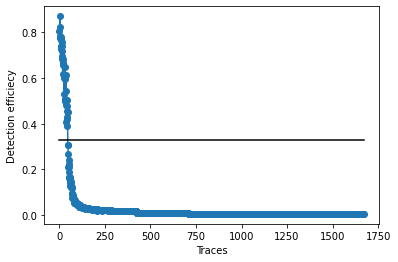

Cannot find steve


In [721]:
icell=10
trcs,keep_tr = ctpa.get_rough_traces(Xs_D,Rs_,hs_,cells_,icell=icell,dth=0.5,gdmax=60,th_fr=0.33)
viewer = None
for iTr in keep_tr[:]:
    X,R,h = Xs_D[cells_==icell],Rs_[cells_==icell],hs_[cells_==icell]
    XT,RT,hT = X[trcs==iTr],R[trcs==iTr],h[trcs==iTr]
    XT_,RT_,hT_ = ctpa.make_trace_unique(XT,RT,hT,th_gd=60)
    XT__,RT__,hT__ = XT_.copy(),RT_.copy(),hT_.copy()
    viewer = ctpa.plot_trace(X,XT__,RT__,np.clip(hT__,0,1),size_pt = 0.1,min_sz=0.05,viewer=viewer)

In [713]:
reload(ctpa)

<module 'ChrTracingPA' from 'C:\\Users\\Bogdan\\Dropbox\\ChromatinTracing2023\\ChrTracingPA.py'>

In [710]:
keep_tr

array([ 132,   83,   92,  230,  103,  139,  157,   87,   22,  114,   86,
        120,  263,  138,   47,   97,   88,   49,   82,   58,  140,   90,
         51,  268,   52,   75,  113,  109,  119,    7,   93,   94,   84,
        118,  110,  135,  121,   89,  216,   85,  115,  273,   41,  111,
         81,  205,  164,  344,  261,  125,   40,  133,  100,  117,    5,
        202,  123,   96,  147,  107,  134,  198,  101,  155, 1064,  298,
        176,  122])

In [736]:
def apply_drift_trace(Xs_T,Rs_T):
    XsT_CC = Xs_T.copy()
    XsT_CC+=np.array([dic_col_drift[(icell,dic_Rcol[iR])]for _,iR in zip(cells_,Rs_T)])
    HybeT_ = (Rs_T-1)//3
    XsT_D = XsT_CC.copy()
    XsT_D-= np.array([drift_hybe[hybe] for hybe in HybeT_])
    return XsT_D

#icell=10
viewer = None
for iTr in [keep_tr[3]]:#keep_tr[:2]:#[128,82]:#keep_tr:
#iTr=31#trcs[0]#6953
    X,R,h = Xs_D[cells_==icell],Rs_[cells_==icell],hs_[cells_==icell]
    XT,RT,hT = X[trcs==iTr],R[trcs==iTr],h[trcs==iTr]
    XT_,RT_,hT_ = ctpa.make_trace_unique(XT,RT,hT,th_gd=60)
    XT__,RT__,hT__ = XT_.copy(),RT_.copy(),hT_.copy()
    #Xs,Rs,hs,Xs_T,Rs_T,hs_T = ctpa.get_points_cell(chr_,
    #                                icell_=icell,bad_points=50,std_th=0.05)
    #Xs_T = apply_drift_trace(Xs_T,Rs_T)
    XT__,RT__,hT__ = XT_.copy(),RT_.copy(),hT_.copy()#ctpa.refine_trace(Xs_T,Rs_T,hs_T,XT_,RT_,hT_,th_gd=50,per_keep=2,use_brightness=False)
    if True:
        Xs,Rs,hs,Xs_T,Rs_T,hs_T = ctpa.get_points_cell(chr_,
                                    icell_=icell,bad_points=50,std_th=0.025)
        Xs_T = apply_drift_trace(Xs_T,Rs_T)
        for iiter in range(3):
            XT__,RT__,hT__ = ctpa.refine_trace(Xs_T,Rs_T,hs_T,XT__,RT__,hT__,th_gd=60,per_keep=2.5,use_brightness=False)


        Xs,Rs,hs,Xs_T,Rs_T,hs_T = ctpa.get_points_cell(chr_,
                                    icell_=icell,bad_points=50,std_th=0.0125)
        Xs_T = apply_drift_trace(Xs_T,Rs_T)
        for iiter in range(3):
            XT__,RT__,hT__ = ctpa.refine_trace(Xs_T,Rs_T,hs_T,XT__,RT__,hT__,th_gd=20,per_keep=2.5,use_brightness=False)

    #len(RT__)
    print(len(RT__)/len(np.unique(Rs_)))
    #plt.figure()
    #plt.plot(RT__,'o-')
    viewer = ctpa.plot_trace(X,XT_,RT_,np.clip(hT_,0,1),size_pt = 0.1,min_sz=0.05,viewer=viewer,name="Raw"+str(iTr))
    viewer = ctpa.plot_trace(X,XT__,RT__,np.clip(hT__,0,1),size_pt = 0.1,min_sz=0.05,viewer=viewer,name="Refined"+str(iTr))

0.8817204301075269
Cannot find steve


In [691]:
len(RT__)

144

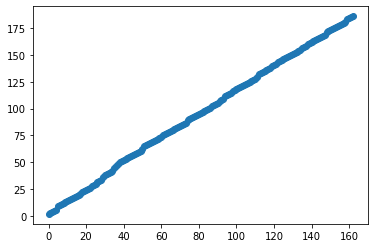

In [732]:
plt.plot(RT__,'o-')

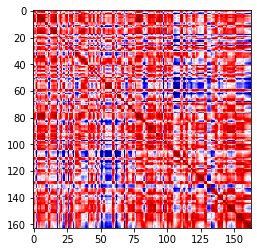

In [735]:
from scipy.spatial.distance import cdist
M = cdist(XT__,XT__)
plt.imshow(M,vmax=2,cmap='seismic_r')

In [583]:
#viewer = ctpa.plot_trace(X,XT_,RT_,hT_,size_pt = 0.15,min_sz=0.1)

In [662]:
viewer = ctpa.plot_trace(X,XT__,RT__,np.clip(hT__,0,1),size_pt = 0.1,min_sz=0.05)

Cannot find steve


In [535]:
#viewer = napari.Viewer()
Xtt = XT__[:,:]*[0.5,1,1]
data = [np.array([Xtt[i],Xtt[i+1]])for i in range(len(Xtt)-1)]
edge_color = [np.array(cmap.rainbow(i/len(data)))for i in range(len(data)-1)]
viewer.add_shapes(data = data,shape_type='path',edge_width=0.005,opacity=1,edge_color=edge_color)


C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\napari\layers\utils\color_transformations.py:53: UserWarning: The provided face_color parameter has 173 entries, while the data contains 174 entries. Setting face_color to white.
  warnings.warn(
  File "C:\Users\Bogdan\anaconda3\envs\cellpose\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Bogdan\anaconda3\envs\cellpose\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "C:\Users\Bogdan\anaconda3\envs\cellpose\lib\site-packages\tor

<Shapes layer 'data' at 0x23d60b87340>

In [308]:
edge_color

[(0.5, 0.0, 1.0, 1.0),
 (0.49215686274509807, 0.012319659535238442, 0.9999810273487268, 1.0),
 (0.4764705882352941, 0.03695149938914489, 0.9998292504580527, 1.0),
 (0.46862745098039216, 0.04925994109281685, 0.9996964519778716, 1.0),
 (0.45294117647058824, 0.07385252747487396, 0.9993170601430229, 1.0),
 (0.44509803921568625, 0.08613293949614599, 0.9990704811844932, 1.0),
 (0.4294117647058824, 0.11065268189150083, 0.9984636039674339, 1.0),
 (0.4215686274509804, 0.12288829066471411, 0.9981033287370441, 1.0),
 (0.40588235294117647, 0.1473016980546375, 0.997269173385788, 1.0),
 (0.39803921568627454, 0.1594757912099808, 0.9967953249171991, 1.0),
 (0.38235294117647056, 0.18374951781657034, 0.9957341762950345, 1.0),
 (0.37450980392156863, 0.19584546700716696, 0.9951469164070644, 1.0),
 (0.3588235294117647, 0.2199463578396686, 0.9938591368952737, 1.0),
 (0.3509803921568627, 0.23194764145389815, 0.9931586661366362, 1.0),
 (0.33529411764705885, 0.2558427775944356, 0.9916446955107427, 1.0),
 (0.32

0.0625575302697727 0.025


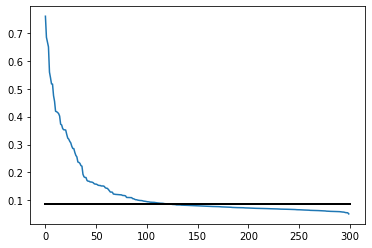

In [492]:
plt.figure()
for iR in np.unique(Rs)[[121]]:#20
    plt.plot(np.sort(hs[Rs==iR])[::-1],'-')
    min_ = np.median(np.sort(hs[Rs==iR])[:50])
    std_ = 0.025
    print(min_,std_)
    plt.plot([0,np.sum(Rs==iR)],[min_+std_,min_+std_],'k',lw=2)
#plt.plot(np.sort(hsnorm),'o-')

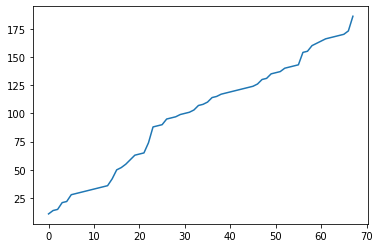

In [240]:
plt.plot(RT__)

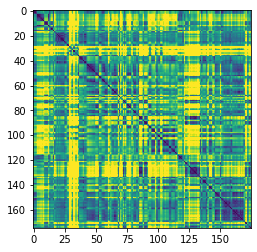

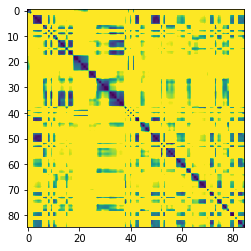

In [124]:
from scipy.spatial.distance import cdist
M = cdist(XT_,XT_)
plt.imshow(M,vmax=1)

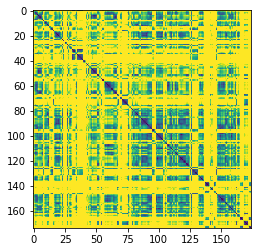

In [114]:
from scipy.spatial.distance import cdist
M = cdist(XT__,XT__)
plt.imshow(M,vmax=1)

In [106]:
len(RT__)

174

In [107]:
reload(ctpa)


Cannot find steve


In [103]:
iTr=trcs[1654]
#iTr=trcs[5250]
#iTr =trcs[0]
iTr=5
XT = X[trcs==iTr]
RT = R[trcs==iTr]
hT = h[trcs==iTr]



XT_,RT_,hT_ = make_trace_unique(XT,RT,hT,th_gd=20)


Xs,Rs,hs,Xs_T,Rs_T,hs_T = ctpa.get_points_cell(chr_,
                                icell_=icell,bad_points=50,std_th=0.0)

XT__,RT__,hT__ = refine_trace(Xs_T,Rs_T,hs_T,XT_,RT_,hT_,th_gd=10,per_keep=2.5,use_brightness=False)
#XT__,RT__,hT__ = refine_trace(Xs_T,Rs_T,hs_T,XT__,RT__,hT__,th_gd=20,per_keep=2.5,use_brightness=True)

#XT__,RT__,hT__ = refine_trace(Xs_T,Rs_T,hs_T,XT__,RT__,hT__,th_gd=10,per_keep=1)
#XT__,RT__,hT__ = refine_trace(Xs_T,Rs_T,hs_T,XT_,RT_,hT_,th_gd=10,per_keep=1)
#viewer = plot_trace(X,XT_,RT_,hT_,size_pt = 0.25)
viewer = plot_trace(X,XT__,RT__,hT__,size_pt = 0.25,min_sz=0.1)

NameError: name 'make_trace_unique' is not defined

In [1508]:
viewer = plot_trace(X,XT_,RT_,hT_,size_pt = 0.25,min_sz=0.1)

In [1356]:
#plt.figure()
#plt.imshow(cdist(XT_,XT_),cmap='seismic_r',vmax=2)

In [1491]:
len(np.unique(RT__)),len(np.unique(RT))

(181, 132)

In [1348]:
RT_

array([  5,   6,   7,   8,   9,  10,  12,  13,  15,  16,  17,  18,  19,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  35,  36,
        37,  38,  39,  41,  42,  43,  44,  48,  50,  51,  52,  53,  54,
        55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  72,  75,  77,  78,  79,  80,  83,  84,  85,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 106, 107,
       108, 110, 111, 112, 113, 114, 116, 117, 118, 120, 121, 122, 123,
       124, 125, 127, 128, 129, 130, 131, 132, 133, 139, 140, 141, 142,
       143, 144, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 159,
       160, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 177, 178, 179, 180, 181, 182, 183, 186])

In [ ]:
    from scipy.spatial.distance import cdist
    d = cdist(X,XT)
    gd = cdist(R[:,np.newaxis],RT[:,np.newaxis])
    W = w(d,gd)
    W[gd==0]=np.nan
    W[gd>20]=np.nan
    WT = np.nanmean(W,axis=-1)
    #[is_tr]
    uRs = np.unique(R)

In [1306]:
SC = 
for R_ in uRs:
    
[np.argmax(WT[R==R_]) ]

[1,
 2,
 6,
 17,
 51,
 24,
 39,
 40,
 9,
 7,
 28,
 31,
 2,
 15,
 39,
 9,
 32,
 6,
 4,
 25,
 34,
 23,
 9,
 24,
 20,
 47,
 9,
 32,
 23,
 27,
 19,
 30,
 7,
 30,
 10,
 6,
 20,
 19,
 8,
 22,
 10,
 38,
 31,
 6,
 17,
 23,
 2,
 14,
 6,
 26,
 12,
 8,
 7,
 19,
 33,
 28,
 10,
 25,
 5,
 0,
 30,
 11,
 12,
 18,
 12,
 37,
 30,
 5,
 18,
 23,
 23,
 19,
 43,
 0,
 27,
 34,
 18,
 11,
 18,
 19,
 13,
 16,
 10,
 11,
 37,
 8,
 34,
 0,
 13,
 23,
 34,
 22,
 31,
 1,
 7,
 5,
 10,
 27,
 9,
 0,
 10,
 30,
 25,
 20,
 0,
 36,
 32,
 19,
 15,
 34,
 10,
 21,
 10,
 10,
 8,
 43,
 40,
 14,
 49,
 37,
 31,
 25,
 21,
 9,
 2,
 38,
 14,
 4,
 30,
 18,
 4,
 1,
 4,
 3,
 35,
 13,
 7,
 6,
 12,
 12,
 11,
 27,
 15,
 16,
 8,
 15,
 14,
 11,
 35,
 17,
 2,
 22,
 18,
 12,
 24,
 9,
 0,
 25,
 51,
 65,
 45,
 19,
 9,
 41,
 8,
 7,
 34,
 17,
 34,
 6,
 12,
 15,
 1,
 8,
 45,
 3,
 11,
 13,
 10,
 32,
 7,
 44]

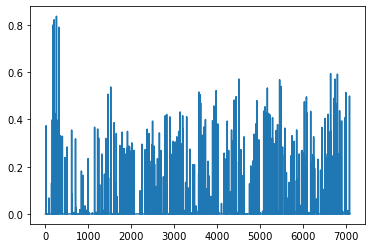

In [1303]:
plt.plot(WT)

In [1272]:
napari.view_shapes(data = [XT[:,:]],shape_type='path',edge_width=0.05,opacity=1,edge_color=[cols[0]])

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 165.07322395640304, 170.20838565361265), zoom=146.98906364806703, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((4.53617703424659, 11.547574256121923, 1.0), (163.60287647179382, 167.54357144101226, 1.0), (168.51630279464342, 172.90046851258185, 1.0)), current_step=(3, 1, 1), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Shapes layer 'Shapes' at 0x19275cd2550>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), ove

In [1251]:
viewer = napari.Viewer()

In [1258]:
layer = viewer.layers[0]
layer.

In [1264]:
cols


array([[4.52941176e-01, 7.38525275e-02, 9.99317060e-01, 1.00000000e+00],
       [4.37254902e-01, 9.84002783e-02, 9.98785992e-01, 1.00000000e+00],
       [4.37254902e-01, 9.84002783e-02, 9.98785992e-01, 1.00000000e+00],
       ...,
       [1.00000000e+00, 4.92599411e-02, 2.46374492e-02, 1.00000000e+00],
       [1.00000000e+00, 4.92599411e-02, 2.46374492e-02, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [1223]:
trcs = np.array([traces[iR] for iR in range(len(traces))])
utrcs,cts_ = np.unique(trcs,return_counts=True)
utrcs = utrcs[np.argsort(cts_)[::-1]]
uRs = np.unique(Rs)
fr_th = 0.3
frs = np.array([len(np.unique(R[trcs==utr]))/len(uRs) for utr in utrcs])
utrcs[frs>fr_th]

array([33, 15, 20, 32, 11, 12, 14,  7, 18, 16, 10, 31, 13, 19, 22, 26,  6,
        2, 34, 29, 24,  4,  9, 23, 25,  1, 38,  3,  5, 28, 21, 30, 17])

In [1182]:
np.max(h)

3.1159523386092833

In [1226]:
iTr=trcs[1411]
iTr=trcs[3077]
iTr=trcs[5185]
iTr=trcs[2868]
iTr=trcs[479]
iTr=trcs[245]
XT = X[trcs==iTr]
RT = R[trcs==iTr]
hT = h[trcs==iTr]
import napari
from matplotlib import cm as cmaps
size=hT*0.25#+0.
viewer = napari.Viewer()
cols = cmap.rainbow(RT/np.max(RT))
txt = list((RT-3).astype(str))
text = {
    'string': txt,
    'size': 10,
    'color': 'white'}
viewer.add_points(X*[0.5,1,1],size=1,face_color=[1,1,1],edge_color=[0,0,0,0],edge_width=0)#,text=text)
viewer.add_points(XT*[0.5,1,1],size=size,face_color=cols,edge_color=[0,0,0,0],edge_width=0)#,text=text)


<Points layer 'Points [1]' at 0x1922e66f670>

In [1218]:
iTr=trcs[2868]
iTr=trcs[479]
RT = R[np.in1d(trcs,[trcs[2868],trcs[479]])]

In [1219]:
len(np.unique(RT)),np.unique(RT,return_counts=True)

(110,
 (array([  4,   5,   6,   7,   8,  10,  11,  12,  13,  17,  23,  26,  28,
          29,  32,  33,  34,  38,  39,  41,  42,  43,  44,  45,  46,  48,
          50,  51,  52,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
          64,  65,  66,  67,  70,  71,  72,  75,  77,  78,  79,  80,  92,
          95,  96,  99, 101, 103, 105, 108, 110, 111, 113, 114, 116, 117,
         123, 124, 125, 126, 127, 128, 130, 131, 133, 135, 139, 140, 141,
         143, 144, 145, 146, 147, 148, 149, 152, 153, 155, 156, 157, 163,
         164, 165, 166, 167, 168, 171, 172, 173, 174, 175, 177, 178, 179,
         180, 181, 182, 183, 184, 185]),
  array([3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 2, 4, 2,
         3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
         1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 2,
         1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 2, 3, 3,
         1, 1, 1, 1, 3, 2, 3, 4, 3, 3, 4, 3, 3, 1, 1, 3, 1, 2

In [1066]:
np.unique(Rs)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

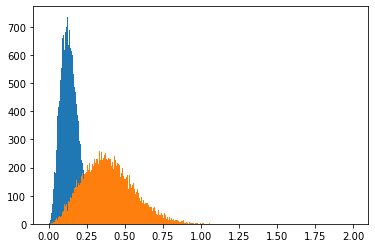

In [1007]:
import numpy as np
x = np.arange(0.,2,0.001)
w_ = w(x,gd=1)
w_ = w_/np.sum(w_)
vals = np.random.choice(x, p=w_,size=100000)
plt.hist(vals,bins=x);
w_ = w(x,gd=10)
w_ = w_/np.sum(w_)
vals = np.random.choice(x, p=w_,size=100000)
plt.hist(vals,bins=x);

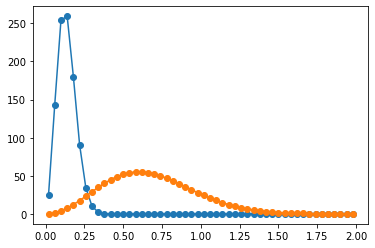

In [916]:
x = np.arange(0.,2,0.001)

w_ = np.sum(w(x,gd=1).reshape([50,-1]),axis=-1)
x_ = np.mean(x.reshape([50,-1]),axis=-1)
plt.plot(x_,w_,'o-')
w_ = np.sum(w(x,gd=30).reshape([50,-1]),axis=-1)
x_ = np.mean(x.reshape([50,-1]),axis=-1)
plt.plot(x_,w_,'o-')


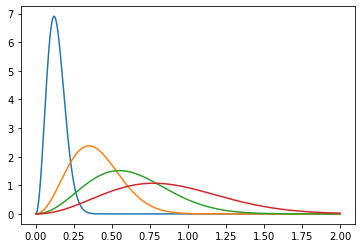

In [886]:
x = np.arange(0.,2,0.001)

w_ = np.sum(w(x).reshape([50,-1]),axis=0)
x_ = np.mean(x.reshape([50,-1]),axis=0)
plt.plot(x,w(x),'-')
plt.plot(x,w(x,gd=10),'-')
plt.plot(x,w(x,gd=25),'-')
plt.plot(x,w(x,gd=50),'-')


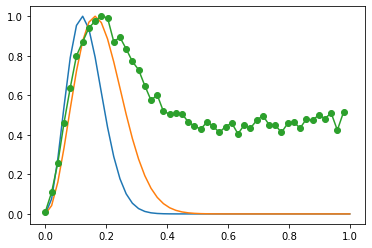

In [805]:
#ssq = 2*sigmasq+k*genomic
s = 0.085
ssq = s*s
sigmasq = 0.025**2
#2/3*k*genomic = 
genomic = 1
k = (ssq-2*sigmasq)/genomic

genomic = 2
s2 = np.sqrt(2*sigmasq+k*genomic)
plt.plot(x,w(x)/np.max(w(x)))
plt.plot(x,w(x,s=s2)/np.max(w(x,s=s2)))

all_dists = ctpa.get_NN_distances(Xs_D,Rs_, deltaR=genomic)

ns,_ = np.histogram(all_dists,bins=x)
plt.plot(x[:-1],ns/np.max(ns),'o-')

In [818]:
np.sum([len(e)for e in res])

96434

In [819]:
res

[[0, 3506],
 [1, 4465],
 [2],
 [3, 1032, 3825, 4561, 6615, 6859],
 [4],
 [5, 3744, 3771, 3934, 4947, 6371, 6465, 6824],
 [6, 1304, 2903, 4587, 4617],
 [7],
 [8, 323, 750, 3255],
 [9],
 [10],
 [11, 2905],
 [12, 83, 175, 424, 662, 2140, 2209, 3742, 3773],
 [13, 2348, 3378, 4097, 4346, 5024, 5341, 5633, 5657, 5732],
 [14,
  65,
  129,
  213,
  407,
  448,
  511,
  2487,
  2540,
  2746,
  3535,
  4294,
  5330,
  5381,
  5719,
  5743,
  5865,
  6388,
  6894,
  6998,
  7046],
 [15, 100, 128, 994, 1347, 4268, 6588, 6710, 6778, 6811, 6888],
 [16,
  115,
  363,
  393,
  841,
  854,
  906,
  956,
  1003,
  1009,
  1059,
  1157,
  1426,
  1474,
  1560,
  1901,
  2419,
  2473,
  2572,
  3110,
  3237,
  3446,
  3528,
  3583,
  3642,
  3757,
  3817,
  3993,
  4195,
  4237,
  4292,
  4974,
  4993,
  5261,
  5301,
  6002,
  6021,
  6139,
  6345,
  6378,
  6654,
  6720,
  6906,
  6999,
  7084],
 [17, 90, 163, 780, 840, 4917, 5602, 5970, 6007, 6855, 6898, 6954, 6996, 7066],
 [18,
  160,
  505,
  995,
  

In [708]:

#drift_hybe = calculate_drift(Xs_D,Hybe_,ncompare = 20)
#np.mean(np.abs(np.array([drift_hybe[key]*1000 for key in drift_hybe],dtype=int)))

C:\Users\bbint\AppData\Local\Temp/ipykernel_5520/3430856897.py:31: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(a,b)[0]


In [703]:
np.median(np.abs(Xs_CC-Xs_D))*1000

13.280302228565688

array([[-34,  14,  -2],
       [-26,  25, -11],
       [-15,   7,  -4],
       [-12,  45, -11],
       [-16,  27,  -8],
       [ -6,  61,   4],
       [-21,  -2,   0],
       [-14,  35,   8],
       [  3,  27,  15],
       [ -6,  33, -11],
       [ 15,  16,  20],
       [ 17,  40, -12],
       [-15,  56, -41],
       [  3,  22,   7],
       [ -4,  63,  27],
       [  4,  26,  15],
       [  2,  51,   6],
       [  0,  10, -36],
       [ -8,  38,   2],
       [  6,  46, -29],
       [  0,  27,  -6],
       [ 10,   0, -21],
       [ -4,  10,   5],
       [ 13,  39, -10],
       [  3,  32,  22],
       [  3,  66, -10],
       [  8,  27,   4],
       [  3,  36,  17],
       [  8,  37, -29],
       [ 18,  72, -24],
       [  1,  35,  13],
       [  0,   0,   0],
       [ 14,  28,  29],
       [  8,  85,  -5],
       [-13,   7,   3],
       [ 19,  15, -17],
       [ 16,  41,  34],
       [ 12,  40,  -6],
       [  4,  42,  31],
       [  2,  48,  15],
       [ 16,   6,   8],
       [ 10,  24

In [675]:
for hybe in Hybe_

{0: array([-0.04296071,  0.00939631,  0.01305039]),
 1: array([-0.02409065,  0.02177272, -0.01091121]),
 2: array([-0.01292863,  0.00626205, -0.00429392]),
 3: array([-0.01148957,  0.03417944, -0.01005487]),
 4: array([-0.0187624 ,  0.02191028, -0.00496299]),
 5: array([-0.00642105,  0.05317084, -0.00041636]),
 6: array([-0.02206637, -0.00506784, -0.00144162]),
 7: array([-0.01088688,  0.0289415 ,  0.00666882]),
 8: array([0.0022627 , 0.02159558, 0.01235086]),
 9: array([-0.00636588,  0.02678271, -0.00929748]),
 10: array([0.0121909 , 0.01429723, 0.01535828]),
 11: array([ 0.01263688,  0.02821325, -0.01174625]),
 12: array([-0.01163061,  0.04715414, -0.03381894]),
 13: array([0.00248018, 0.01795682, 0.00502464]),
 14: array([-0.00025209,  0.05395605,  0.01722324]),
 15: array([0.00295836, 0.02233591, 0.0104109 ]),
 16: array([-0.00035038,  0.04093912,  0.00383651]),
 17: array([-0.00055594,  0.0104615 , -0.0319564 ]),
 18: array([-0.00785506,  0.03305814, -0.00023905]),
 19: array([ 0.

In [661]:
np.median(np.abs(res1-res2),axis=0)

array([ 8. , 13.5,  6. ])

(-33.4, 19.4, -26.8, 34.8)

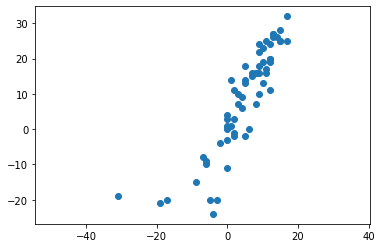

In [664]:
plt.plot(res1[:,0],res2[:,0],'o')
plt.axis('equal')

In [619]:
res = np.linalg.lstsq(a,b)
(res[0]*1000).astype(int)

C:\Users\bbint\AppData\Local\Temp/ipykernel_5520/2541840730.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(a,b)


array([[  0,   0,   0],
       [-27,  21, -22],
       [-15,   6, -12],
       [-10,  36, -25],
       [-13,  18,   0],
       [  0,  40,   6],
       [-48,  13, -13],
       [-14,  46,   8],
       [-15,  25,  17],
       [-11,  33,  -7],
       [ 14,  19,   2],
       [ 18,  48, -15],
       [-15,  54, -46],
       [ -5,  16,  -2],
       [ -1,  51,  16],
       [ -4,  25,   5],
       [ -3,  43,  12],
       [  0,   7, -35],
       [ -6,  39,   0],
       [ 21,  45, -22],
       [  2,  31,  -2],
       [  0,  -1, -28],
       [-11,  11,  13],
       [  0,  35,  -1],
       [ -3,  42,  15],
       [ -3,  60, -12],
       [  9,  29,   8],
       [ -8,  32,  12],
       [ 10,  31, -23],
       [  6,  72, -19],
       [ -7,  35,   2],
       [  0,   0,   0],
       [  0,  31,  13],
       [  0,  85,  -9],
       [ -9,  19,  -3],
       [  8,  12, -10],
       [  1,  51,  29],
       [  7,  39, -10],
       [  0,  40,  19],
       [-15,  47,  10],
       [  2,  19,   4],
       [  2,  27

In [612]:
res = np.linalg.lstsq(a,b)
(res[0]*1000).astype(int)

C:\Users\bbint\AppData\Local\Temp/ipykernel_5520/2541840730.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(a,b)


array([[-45,   8,  13],
       [-27,  25, -11],
       [-16,   6,  -2],
       [-13,  35,  -8],
       [-21,  23,  -1],
       [ -8,  55,  -1],
       [-21,  -2,  -1],
       [-11,  33,   4],
       [  0,  24,  13],
       [ -6,  29,  -7],
       [ 11,  15,  15],
       [ 11,  31, -11],
       [-11,  49, -32],
       [  1,  20,   6],
       [  0,  56,  17],
       [  1,  24,  10],
       [ -1,  43,   3],
       [  0,  12, -32],
       [ -9,  36,   0],
       [  5,  42, -24],
       [ -1,  26,  -4],
       [  9,   0, -17],
       [ -2,  11,   3],
       [ 12,  36,  -9],
       [  4,  29,  16],
       [  2,  59, -10],
       [  5,  23,   5],
       [  3,  28,  14],
       [  8,  32, -26],
       [ 14,  60, -22],
       [  3,  33,   8],
       [  0,   0,   0],
       [ 10,  26,  22],
       [  5,  73,  -6],
       [-11,   7,   1],
       [ 16,  16, -16],
       [ 14,  36,  27],
       [  7,  37,  -5],
       [  4,  36,  26],
       [  0,  41,  12],
       [ 13,   7,   4],
       [  8,  23

In [579]:
res = np.linalg.lstsq(a,b)
(res[0]*1000).astype(int)

C:\Users\bbint\AppData\Local\Temp/ipykernel_5520/2541840730.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(a,b)


array([[-26,  -2,  -6],
       [-17,  16,  -8],
       [ -9,   5,  -6],
       [ -5,  30, -13],
       [ -4,  18,  -4],
       [ -6,  40,  -2],
       [-23,   3,  -1],
       [  0,  24,   6],
       [  0,  17,  14],
       [ -2,  25, -11],
       [ 10,  16,  11],
       [ 12,  29, -11],
       [ -3,  40, -26],
       [  4,  15,   4],
       [  5,  45,  18],
       [  3,  18,  12],
       [  0,  33,   2],
       [  2,   7, -28],
       [ -6,  24,  -4],
       [  4,  38, -22],
       [  2,  18,  -1],
       [  8,  -5, -14],
       [  0,   6,   1],
       [  9,  25,  -5],
       [  3,  29,  19],
       [  3,  52, -12],
       [  2,  15,   5],
       [  0,  27,  12],
       [  9,  23, -23],
       [ 15,  51, -19],
       [  2,  23,  10],
       [  0,   0,   0],
       [  8,  21,  25],
       [  5,  59,  -2],
       [ -7,   0,   0],
       [ 15,   9, -16],
       [ 12,  28,  24],
       [  5,  29,  -3],
       [  1,  31,  23],
       [  2,  29,   9],
       [  9,   2,   5],
       [  7,  15

In [544]:
cmsum = np.cumsum([dic_pair[key] for key in dic_pair],axis=0)
cmsum-cmsum[40]

array([[  86.70551717, -237.57580894,  -15.82298053],
       [  69.55614196, -219.91788425,  -24.54341582],
       [  60.74850881, -264.49455388,   -5.93100175],
       [  61.30486128, -215.39937147,  -19.60012075],
       [  63.24430195, -256.04414909,  -15.09440521],
       [ 117.4725395 , -162.13979867,   -8.37547194],
       [  92.7632429 , -212.07940595,   -8.57954306],
       [  64.62180784, -233.14421414,   -3.98624393],
       [  87.47051558, -247.90413247,   44.9883008 ],
       [  81.6980797 , -235.41067852,    7.38226744],
       [  72.39990133, -248.93323893,   62.35501649],
       [  78.94738777, -285.35981195,   96.17192057],
       [  82.84381186, -193.93302638,   25.92948558],
       [ 117.34447177, -290.25186563,   -6.14735955],
       [  82.34604031, -228.45485878,   31.89018065],
       [ 103.59138981, -250.57227741,   32.01802907],
       [ 108.64423016, -163.64356293,   92.48441447],
       [ 119.70106474, -217.73774622,   21.90919138],
       [  71.93592869, -197.

In [426]:
np.nanmedian(dic_pair[(2,0)],axis=0),np.nanstd(dic_pair[(2,0)],axis=0)

(array([ 0.2053258 ,  0.48964111, -0.13824874]),
 array([0.15585254, 0.50246974, 0.52670492]))

In [419]:
np.nanmedian(dic_pair[(2,0)],axis=0)

array([ 0.2053258 ,  0.48964111, -0.13824874])

In [424]:
np.nanmedian(dic_pair[(0,1)],axis=0)+np.nanmedian(dic_pair[(1,2)],axis=0)

array([-0.26254129, -0.50287496,  0.20056726])

array([ 0.15599874,  0.70683556, -0.42631205])

In [155]:
import napari

size=hsnorm_*0.5
viewer = napari.Viewer()
iR=74
keep = Rs==iR
viewer.add_points(Xs[keep],size=size[keep],face_color='g',blending='additive',edge_color=[0,0,0,0])
keep = Rs==(iR-1)
viewer.add_points(Xs[keep],size=size[keep],face_color='r',blending='additive',edge_color=[0,0,0,0])
keep = Rs==(iR+1)
viewer.add_points(Xs[keep],size=size[keep],face_color='b',blending='additive',edge_color=[0,0,0,0])

<Points layer 'Points [2]' at 0x191ce861280>

In [228]:
def main_analysis(ifov,save_folder=r'\\132.239.201.16\Raw_data_2\Glass_MERFISH\CGBB_10_7_2022_5K_Analysis_v4',nHs=94,
                  niter=4,volume_th=200000,overwrite=False,close_all=True,return_obj=False,th_score = -2.75,load_new_drift=True):
    import sys,os,glob
    
    import ChrTracingPA as ctpa
    import imp
    imp.reload(ctpa)
    import numpy as np
    import matplotlib.pylab as plt
    import pickle
    from tqdm.notebook import tqdm
    chr_ = None
    
    save_fl = save_folder+os.sep+"Fov"+str(ifov)+"_zxys_f.pkl"
    #print(os.path.exists(save_fl))
    if not os.path.exists(save_fl) or overwrite:
        chr_ = ctpa.chromatin_postfits(save_folder=save_folder,nHs=nHs)
        chr_.th_score=th_score
        chr_.dic_fls = {ifv_:np.array([fl for fl in chr_.dic_fls[ifv_] if 'R' in os.path.basename(fl).split('--')[1]]) 
                for ifv_ in chr_.dic_fls}
        nHs = len(chr_.dic_fls[ifov])
        print(chr_.completed_fovs)
        if ifov in chr_.completed_fovs:
            fov = ifov#chr_.completed_fovs[ifov]
            
            print(fov)
            
            #for fov in [42, 43, 44, 46, 47, 48, 49]:
            try:
                for niter in range(niter):
                    chr_.load_fov(fov,volume_th=volume_th)
                    save_fl = chr_.save_folder+os.sep+"Fov"+str(fov)+"_zxys_f.pkl"
                    #check_a_cell(self,13,nchr_=5,volume_th=200000,pix=[0.200,0.1083,0.1083],
                    #                 radius_chr = 1.25,enhanced_radius=1.25,fr_th=0.5,plt_val=True)

#                     for drift in chr_bad.dic_drifts:
#                         drift['Ds'][0]=drift['Ds'][0]*[0,1,1]
                    chr_.get_X_cands(nchr_=3,volume_th=None,pix=[0.200,0.1083,0.1083],
                                     radius_chr = 1.75,radius_cand =2.,fr_th=0.3,nelems=50,plt_val = False)
                    nmax = nHs*3
                    ncol=3
                    chr_.initialize_with_max_brightness(nkeep = 8000,Rs_u = np.arange(nmax)+1)
                    #plot_std_col(self)
                    chr_.normalize_color_brightnesses()
                    chr_.run_EM(nkeep = 8000,niter = 4,Rs_u = np.arange(nmax)+1)
                    
                    print("Fov:-------------",fov)
                    
                    chr_.get_scores_and_threshold(th_score = th_score)
                    chr_.plot_matrix(th_score=th_score,lazy_color_correction = True)
                    if not close_all:
                        plt.show()
                    
                    #bad_fovs_.append([chr_.fov,np.where(np.mean(np.log(chr_.scores_f)>chr_.th_score,axis=0)<0.2)[0]])
                    self = chr_
                    Xf = np.array(self.zxys_f)
                    bad = np.log(self.scores_f)<th_score
                    Xf[bad] = np.nan
                    cms = np.nanmean(Xf,axis=1)
                    Xf_dif = np.nanmedian(Xf-cms[:,np.newaxis],axis=0)#### changed

                    elems = np.mean([Xf_dif[icol::ncol] for icol in np.arange(ncol)],axis=0)
                    Xf_dif = np.array([e for e in elems for icol in np.arange(ncol)])[:len(Xf_dif)]


                    Xf-=Xf_dif[np.newaxis]




                    cm = np.nanmean(Xf[:,:,:],axis=1)[:,np.newaxis]
                    for icol in range(ncol):
                        Xf[:,icol::ncol,:]-=np.nanmean(Xf[:,icol::ncol,:],axis=1)[:,np.newaxis]+cm


                    from scipy.spatial.distance import pdist,squareform
                    mats = np.array([squareform(pdist(X_)) for X_ in Xf])
                    chr_.dic_drift={}
                    plt.figure(figsize=(10,10))
                    plt.title('corrected '+str(niter))
                    keep = np.arange(mats.shape[1])#[icol::3]
                    plt.imshow(np.nanmedian(mats[:,keep][:,:,keep],0),vmax=1,vmin=0.2,cmap='seismic_r')
                    if not close_all:
                        plt.show()
                    if close_all:
                        plt.close('all')
                    for iH in tqdm(np.arange(len(elems))):
                        if iH<len(self.fls_fov):
                            fl = self.fls_fov[iH]
                            fl_  = fl.replace('dic_pts_cell.pkl','new_drift.pkl')
                            if os.path.exists(fl_) and load_new_drift:
                                dic_drift = pickle.load(open(fl_,'rb'))
                            else:
                                dic_drift,dic_pts_cell = pickle.load(open(fl,'rb'))
                            chr_.dic_drift[iH]=(dic_drift,fl)
                            pix=[0.200,0.1083,0.1083]
                            #dic_drift['Ds'][0]+=elems[iH]/pix
                            print(elems[iH]/pix)
                            #print(dic_drift['Ds'][0])
                            dic_drift['Ds'][0]=np.array(dic_drift['Ds'][0],dtype=float)+elems[iH]/pix
                            pickle.dump(dic_drift,open(fl_,'wb'))
                zxys_f,hs_f,scores_f = chr_.zxys_f,chr_.hs_f,chr_.scores_f
                cells_f = np.array(chr_.icell_cands)+chr_.fov*10**4
                pickle.dump([cells_f,zxys_f,hs_f,scores_f],open(save_fl,'wb'))
            except Exception as e:
                print('Failed!!!!!!!!!!!!!!')
                print(e)
    if return_obj:
        return chr_

In [4]:
"""self = chr_ 
for iH in tqdm(np.arange(len(self.fls_fov))):
    if iH<len(self.fls_fov):
        fl = self.fls_fov[iH]
        
        fl_  = fl.replace('dic_pts_cell.pkl','new_drift.pkl')
        if os.path.exists(fl_):
            os.remove(fl_)
""";

In [18]:
??chr_.load_fov

In [7]:
#for i in range(290):
#    chr_ = main_analysis(i,close_all=False,return_obj=True,nHs=24)

Detected fovs: 310 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 232, 233, 235, 236, 237, 238, 

  0%|          | 0/93 [00:00<?, ?it/s]

Found cells: 280


  0%|          | 0/280 [00:00<?, ?it/s]

Detected number of chromosomes:541
Number of cells with 1 chromosomes: 70
Number of cells with 2 chromosomes: 150
Number of cells with 3 chromosomes: 57


  0%|          | 0/541 [00:00<?, ?it/s]

  0%|          | 0/541 [00:00<?, ?it/s]

C:\Users\glasslab\Dropbox\ChrisGlass_Project\ChromatinAnalysisV2\Scope1_Python_Scripts\ChrTracingPA.py:98: RuntimeWarning: invalid value encountered in true_divide
  ret_ = ret[n_ - 1:] / ret_nan[n_ - 1:]


EM iteration number:  1


  0%|          | 0/541 [00:00<?, ?it/s]

fraction the same: 0.7189929340202672
fraction nan: 0.11049278326188697
EM iteration number:  2


  0%|          | 0/541 [00:00<?, ?it/s]

fraction the same: 0.9366487067552863
fraction nan: 0.11049278326188697
EM iteration number:  3


  0%|          | 0/541 [00:00<?, ?it/s]

fraction the same: 0.9831740538272964
fraction nan: 0.11049278326188697
EM iteration number:  4


  0%|          | 0/541 [00:00<?, ?it/s]

fraction the same: 0.9946579095711907
fraction nan: 0.11049278326188697
Fov:------------- 76


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


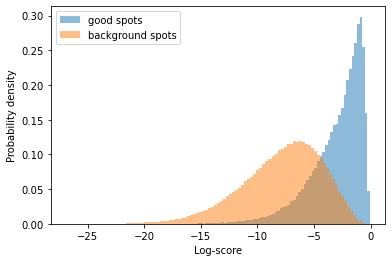

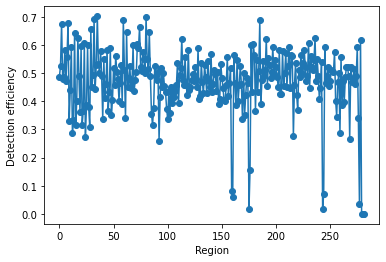

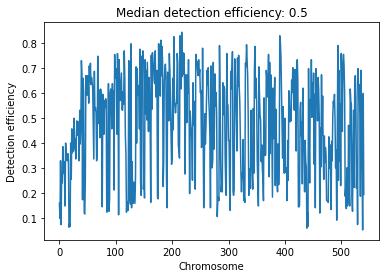

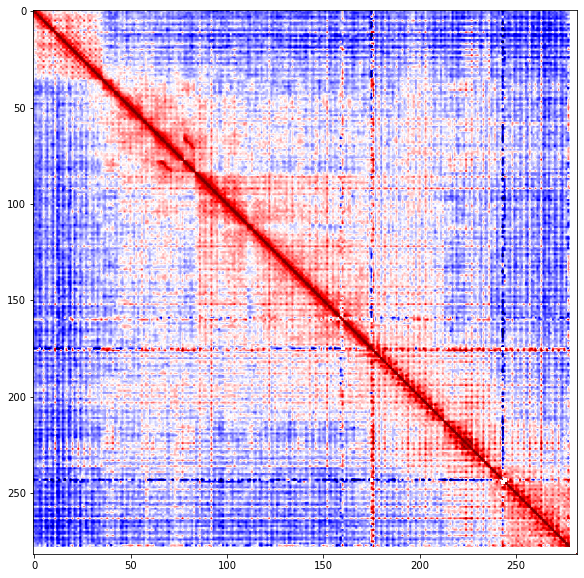

C:\Users\glasslab\AppData\Local\Temp/ipykernel_16356/2407700144.py:69: RuntimeWarning: Mean of empty slice
  Xf[:,icol::ncol,:]-=np.nanmean(Xf[:,icol::ncol,:],axis=1)[:,np.newaxis]+cm


Failed!!!!!!!!!!!!!!
Unable to allocate 328. MiB for an array with shape (541, 282, 282) and data type int64


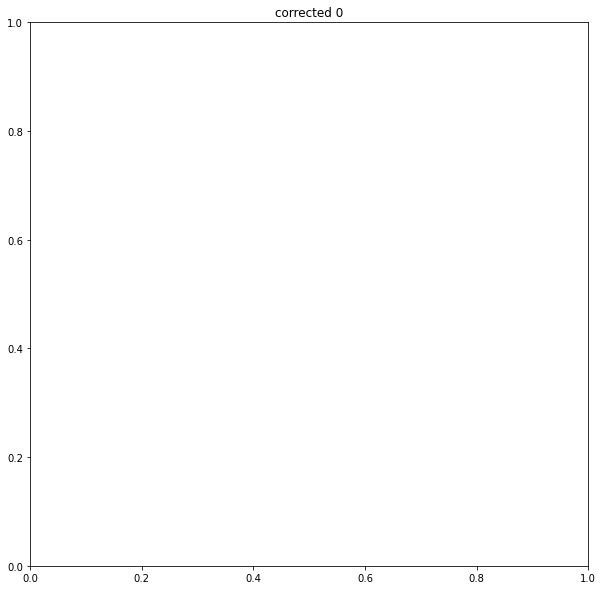

In [7]:
chr_ = main_analysis(76,close_all=False,nHs=94,niter=1,return_obj=True,overwrite=True,th_score = -2.5)

self = chr_
th_score = -2.5
Xf = np.array(self.zxys_f)
bad = np.log(self.scores_f)<th_score
Xf[bad] = np.nan
if True:
    ncol=3
    cm = np.nanmean(Xf[:,:,:],axis=1)[:,np.newaxis]
    for icol in range(ncol):
        Xf[:,icol::ncol,:]-=np.nanmedian(Xf[:,icol::ncol,:],axis=1)[:,np.newaxis]+cm

from scipy.spatial.distance import pdist,squareform
mats = np.array([squareform(pdist(X_)) for X_ in Xf])

plt.figure(figsize=(10,10))
keep = np.arange(mats.shape[1])#[icol::3]
plt.imshow(np.nanmedian(mats[:,keep][:,:,keep],0),vmax=1,vmin=0.2,cmap='seismic_r')

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


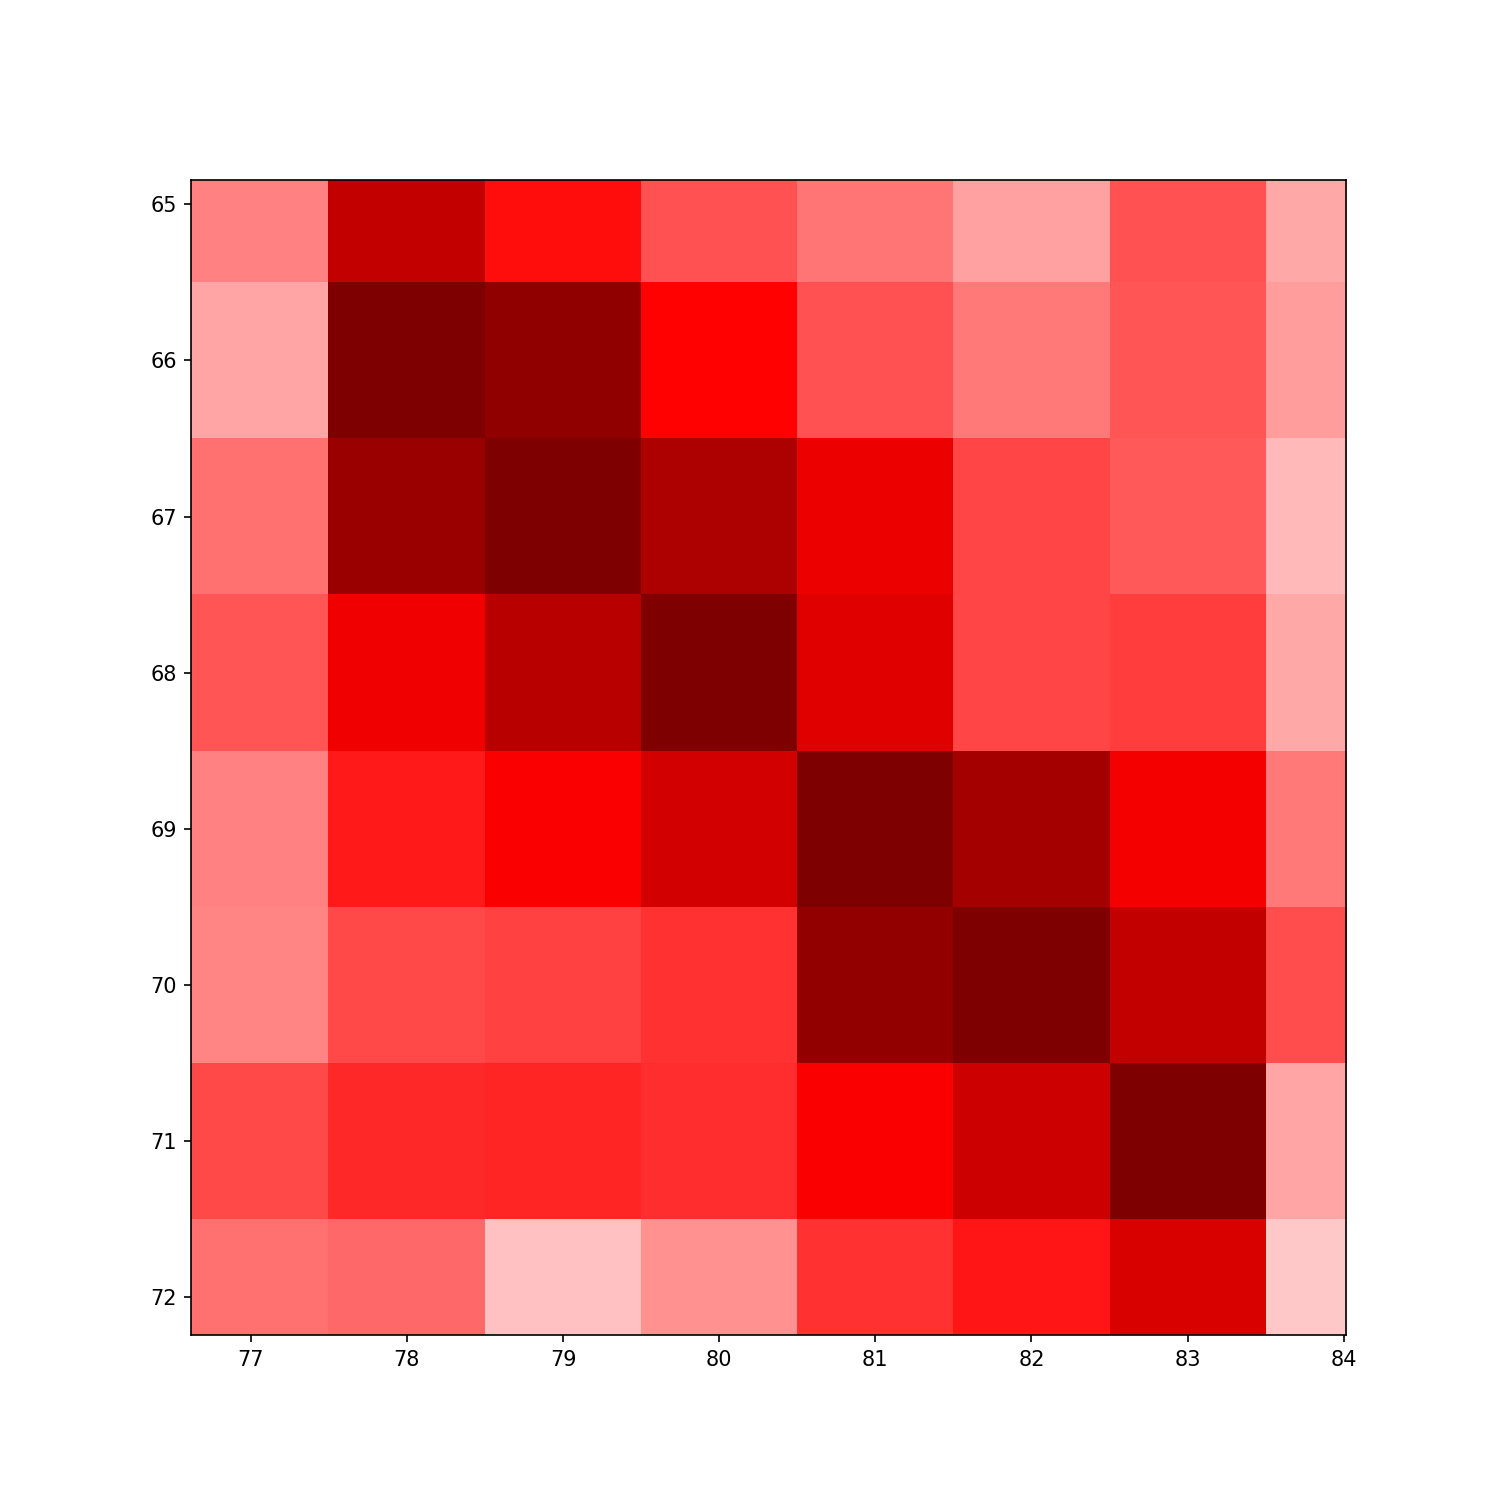

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [10]:
plt.figure(figsize=(10,10))
keep = np.arange(mats.shape[1])#[icol::3]
plt.imshow(np.nanmedian(mats[:,keep][:,:,keep],0),vmax=1,vmin=0.2,cmap='seismic_r')

In [ ]:
79,80,81, 82,83,84

In [18]:
chr_.fls_fov[80//3]

'\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\180--H123_R79,80,81--dic_pts_cell.pkl'

In [ ]:
fl_names_to_change = chr_.fls_fov[78//3-4:]

In [20]:
fl_names_to_change =[ '\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\180--H121_R73,74,75--dic_pts_cell.pkl',
 '\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\180--H122_R76,77,78--dic_pts_cell.pkl']
fl_names_to_change= ['\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\180--H123_R79,80,81--dic_pts_cell.pkl',
 '\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\180--H124_R82,83,84--dic_pts_cell.pkl']
fl_names_to_change

['\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\180--H123_R79,80,81--dic_pts_cell.pkl',
 '\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\180--H124_R82,83,84--dic_pts_cell.pkl']

In [27]:
for fl in fl_names_to_change:
    print(fl)
    fl_new = fl.replace('--H','--B')
    if os.path.exists(fl):
        os.rename(fl,fl_new)

\\132.239.201.16\Raw_data_2\Glass_MERFISH\CGBB_10_7_2022_5K_Analysis_v4\180--H123_R79,80,81--dic_pts_cell.pkl
\\132.239.201.16\Raw_data_2\Glass_MERFISH\CGBB_10_7_2022_5K_Analysis_v4\180--H124_R82,83,84--dic_pts_cell.pkl


In [25]:
os.path.exists(fl)

False

In [ ]:
import matplotlib.pylab as plt
import numpy as np
frs = np.mean(np.log(chr_.scores_f)>chr_.th_score,axis=0)
plt.figure()
plt.plot(frs,'o-')
plt.ylabel('Detection efficiency')
plt.xlabel('Region')

In [ ]:
#chr_.dic_fls[319]

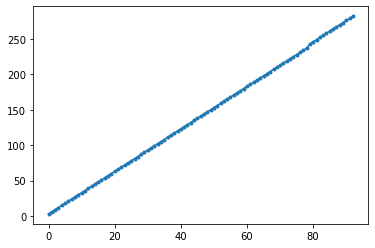

In [19]:
Hs = np.array([fl.split('--')[1].split(',')[-1] for fl in chr_.dic_fls[187]],dtype = int)
plt.figure()
plt.plot(Hs,'.-')

In [ ]:
#after H80 needs to recalculate shift

In [12]:
import matplotlib.pylab as plt
import numpy as np
frs = np.mean(np.log(chr_.scores_f)>chr_.th_score,axis=0)
plt.figure()
plt.plot(frs,'o-')
plt.ylabel('Detection efficiency')
plt.xlabel('Region')

AttributeError: 'chromatin_postfits' object has no attribute 'scores_f'

In [13]:
(np.where(frs<0.3)[0]).astype(int)+1

NameError: name 'frs' is not defined

In [61]:
list1=(np.where(frs<0.3)[0]).astype(int)+1
print(list1)

[ 25  29  37  38  76  77  79  80  82 112 113 176 177 214 215 216 217 218
 219 220 221 222 223 224 225 244 245 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282]


In [78]:
(216-177)/12

3.25

In [73]:
81/12

6.75

In [21]:
print(chr_.save_folder)

\\132.239.201.16\Raw_data_2\Glass_MERFISH\CGBB_10_7_2022_5K_Analysis_v4


In [58]:
import glob,os
png_fls = glob.glob(chr_.save_folder+os.sep+'319--*_*224*.png')
png_fls

['\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\319--H78_R223,224,225_signal-col0.png',
 '\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\319--H78_R223,224,225_signal-col1.png',
 '\\\\132.239.201.16\\Raw_data_2\\Glass_MERFISH\\CGBB_10_7_2022_5K_Analysis_v4\\319--H78_R223,224,225_signal-col2.png']

In [59]:
!"{png_fls[1]}"

In [52]:
H_to_repeat: 13,28,29,30,31,32

(28, 29, 30, 31, 32)

In [57]:
!"{png_fls[2]}"

In [8]:
??chr_.get_scores_and_threshold

In [33]:
np.sort(list(chr_.dic_col.keys()))

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108.])

In [35]:
24*3

72

In [34]:
chr_.Rs_u

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72])